#Task-04

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

## ML Modelling ##
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#load the data
train_df = pd.read_csv('/content/twitter_training.csv',header= None)
train_df.columns =['Id', 'Entity', 'Sentiment', 'Tweet']
train_df['Sentiment'] = train_df['Sentiment'].replace('Irrelevant', 'Neutral')
train_df.head()

test_df = pd.read_csv('/content/twitter_training.csv',header= None)
test_df.columns =['Id', 'Entity', 'Sentiment', 'Tweet']
test_df['Sentiment'] = train_df['Sentiment'].replace('Irrelevant', 'Neutral')

In [ ]:
#checking for null values
train_df.isnull().sum()

Id             0
Entity         0
Sentiment      0
Tweet        686
dtype: int64

In [ ]:
#getting rid of null values
train_df=train_df.dropna()


In [ ]:
# Define the cleaning_URLs function to get rid of URLs in the tweet
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|([^s]+.com)|(https?://[^s]+))','',data)

# Apply the cleaning_URLsto the tweet column
train_df['Tweet'] = train_df['Tweet'].apply(cleaning_URLs)


In [ ]:
# Define the cleaning_numbers function to get rid of numbers in the tweet
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

# Apply the cleaning_numbers_udf to the clean_text column
train_df['Tweet'] = train_df['Tweet'].apply(cleaning_numbers)

In [ ]:
# Define the cleaning_punctation function
def cleaning_punctation(data):
    return re.sub('[^a-zA-Z#]+', ' ', data)

# Apply the cleaning_numbers_udf to the clean_text column
train_df['Tweet'] = train_df['Tweet'].apply(cleaning_punctation)

In [ ]:
#removing all emails in the text
pattern_to_remove = r'\S+@\S+'
# Use str.replace() to remove the pattern from the 'text_column'
train_df['Tweet'] = train_df['Tweet'].str.replace(pattern_to_remove, '', regex=True)


In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

train_df['Tweet'] = train_df['Tweet'].apply(remove_stopwords)

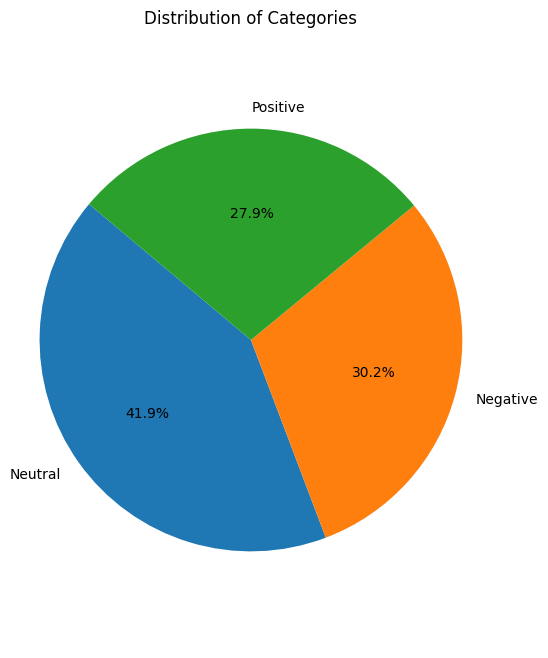

In [ ]:
# Count the occurrences of each category
category_counts = train_df['Sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Distribution of Categories')
plt.show()

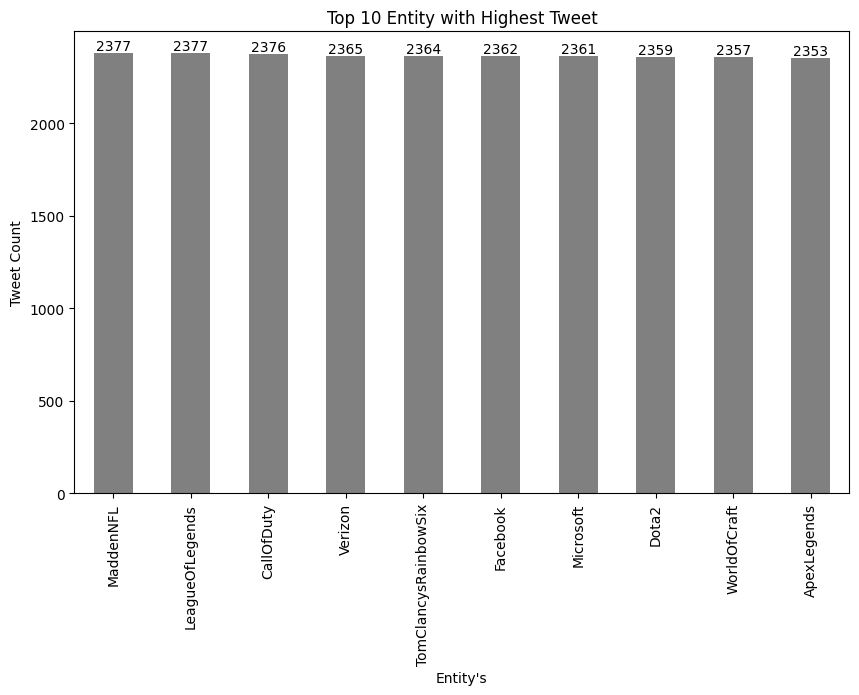

In [ ]:
# Count the occurrences of each category
entity_counts = train_df['Entity'].value_counts()

# Select the top 10 categories
top_10_entity = entity_counts.head(10)


# Plot a bar graph for the top 10 categories
plt.figure(figsize=(10, 6))
top_10_entity.plot(kind='bar', color='Grey')

for i, count in enumerate(entity_counts):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')

plt.xlabel("Entity's")
plt.ylabel('Tweet Count')
plt.title('Top 10 Entity with Highest Tweet')
plt.xticks(rotation=90)
plt.show()


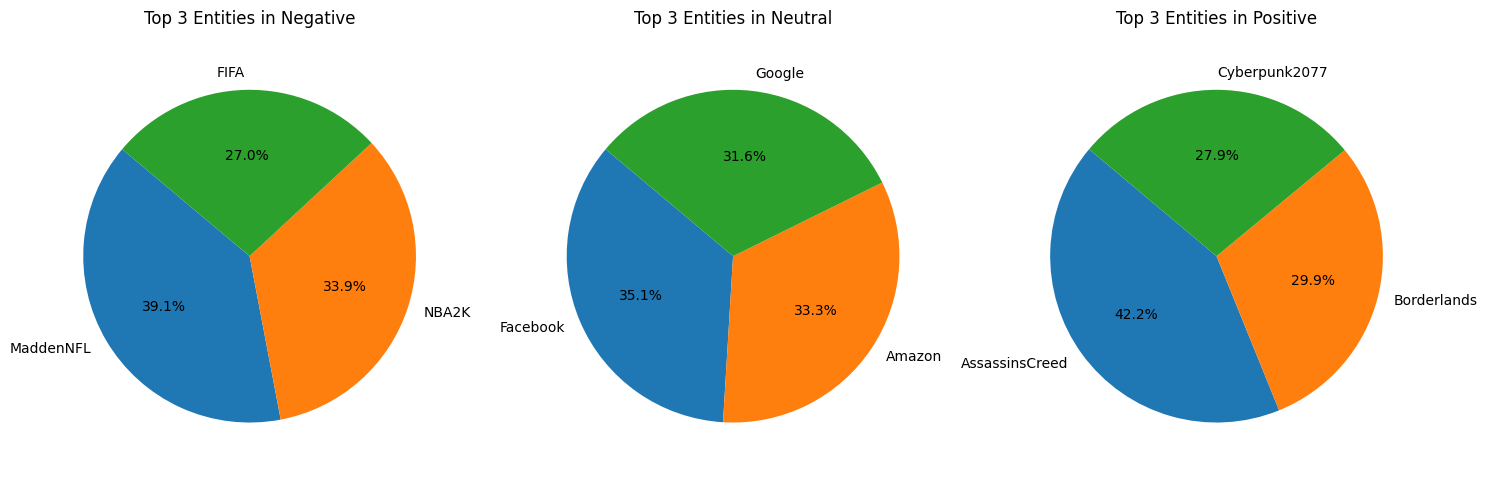

In [ ]:
# Group the data by 'tweet_category' and 'entity' and count occurrences
category_entity_counts = train_df.groupby(['Sentiment', 'Entity']).size().unstack(fill_value=0)

# Create a list to store the top 3 entities for each category
top_three_entities = []

# Iterate through each category
for category in category_entity_counts.index:
    top_entities = category_entity_counts.loc[category].nlargest(3)
    top_three_entities.append(top_entities)

# Create subplots for each category
plt.figure(figsize=(15, 5))
for i, (category, top_entities) in enumerate(zip(category_entity_counts.index, top_three_entities)):
    plt.subplot(1, 3, i + 1)
    plt.pie(top_entities, labels=top_entities.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 3 Entities in {category}')

plt.tight_layout()
plt.show()

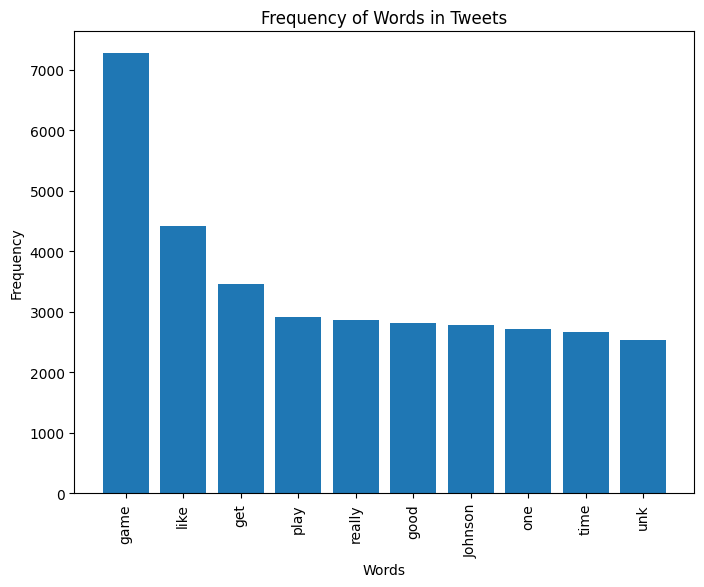

In [ ]:
# Combine all the text into a single string
all_text = " ".join(train_df["Tweet"])

# Split the text into words and explode them into separate rows
word_list = all_text.split()
word_df = pd.DataFrame({"word": word_list})

# Count the frequency of each word and display the top 10
word_df_freq = word_df["word"].value_counts().reset_index()
word_df_freq.columns = ["word", "count"]
top_10_words = word_df_freq.head(10)

plt.figure(figsize=(8, 6))
plt.bar(top_10_words['word'], top_10_words['count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Words in Tweets')
plt.xticks(rotation=90)
plt.show()


Number of unique words: 60753


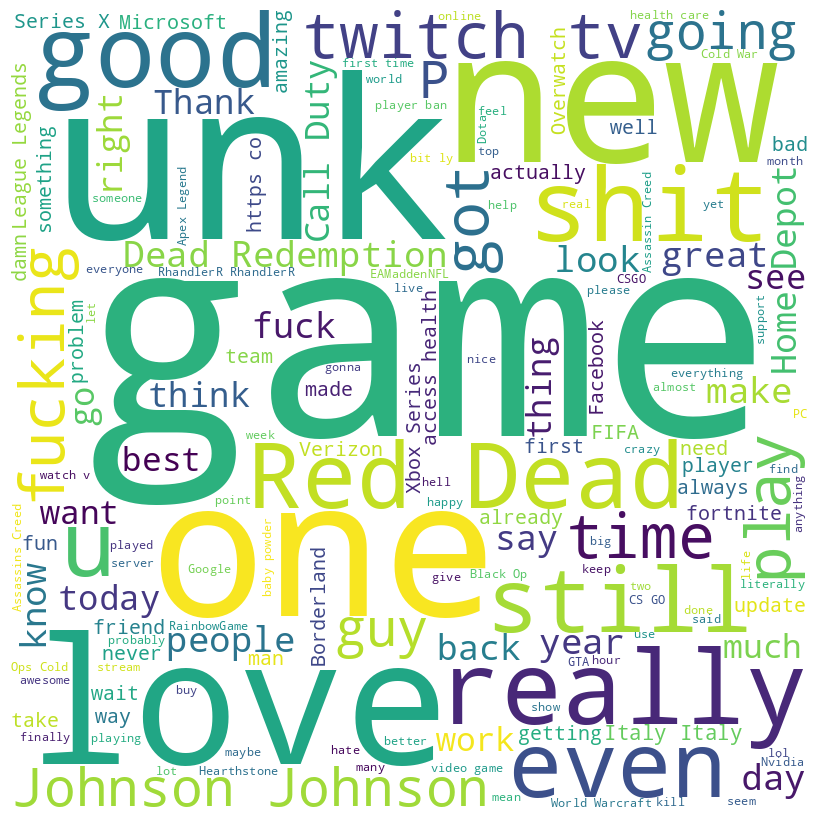

In [ ]:
# to find how many unique words in the vocabulary
unique_words_count = train_df['Tweet'].nunique()
print("Number of unique words:", unique_words_count)

# Extract text data from the 'text_column'
text_data = train_df['Tweet'].astype(str).str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_data)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
bow = bow_vectorizer.fit_transform(train_df['Tweet'])

In [ ]:
#spliting the cleaned data into test and train
X_train, X_test, y_train, y_test = train_test_split(bow, train_df['Sentiment'], test_size=0.2, random_state=69)


In [ ]:
#using naive bayes model to make predicitons
model_naive = MultinomialNB().fit(X_train,y_train)
pred = model_naive.predict(X_test)
print('Optimized Accuracy Score: {0: .3f}'.format(accuracy_score(y_test, pred)))

Optimized Accuracy Score:  0.604


In [ ]:
#custom function to calculate the models accuracy
def accuracy(pred, y_test):
    l=0
    for i,j in zip(pred, y_test):
        if i==j:
            l=l+1
    return l/len(pred)

In [ ]:
#using Decision Tress Classifier to make prediction
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
preds=model.predict(X_train)
accuracy(preds,y_train)

0.9236941685249004